<a href="https://colab.research.google.com/github/M4teoSandoval/Clase-Inteligencia-Artificiall/blob/main/Cuaderno_8_Modelo_Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color="red">Naïve Bayes: Introducción y Aplicación </font>
El modelo Naive Bayes es uno de los algoritmos de clasificación más simples pero efectivos en aprendizaje supervisado. Este modelo se basa en la probabilidad de que una instancia pertenezca a una clase específica, utilizando el Teorema de Bayes. Su simplicidad radica en un supuesto clave: todas las características (o atributos) son independientes entre sí dentro de una clase, lo que rara vez es cierto en escenarios reales, pero aun así permite obtener resultados sorprendentes en muchos problemas.

En la imagen se oberva la ecuación base del Teorema de Bayes, donde la clasificación se realiza por la probabilidad condicionada de los dierentes factores para clasficar triangulos, cuadrado y circulos, en cada una de sus clases.

![imagen](https://github.com/adiacla/bigdata/blob/master/niavebayes.png?raw=true)

---

## <font color="red">8.1 Ventajas y Desventajas del Modelo </font>
### <font color="blue">8.1.1 Ventajas:</font>

* Eficiencia: Naive Bayes es extremadamente rápido en entrenamiento y predicción, especialmente para conjuntos de datos grandes.
* Manejo de datos pequeños: Funciona bien con conjuntos de datos de tamaño reducido.
* Casos específicos: Es muy efectivo en problemas de clasificación de texto, como detección de spam y análisis de sentimientos.
* Probabilístico: Genera predicciones con una estimación de probabilidad, lo que puede ser útil para interpretaciones adicionales.

### <font color="blue">8.1.2 Desventajas </font>

* Suposición de independencia: El supuesto de independencia entre características rara vez se cumple, lo que puede afectar la precisión del modelo.
* Datos categóricos: No maneja naturalmente datos continuos a menos que se transforme mediante discretización o utilizando métodos probabilísticos avanzados.
* Clase con frecuencia cero: Si una clase no aparece en los datos de entrenamiento, la probabilidad asignada será cero (aunque esto se soluciona con suavizado de Laplace).


---

## <font color="red">8.2 El Teorema de Bayes</font>

El Teorema de Bayes describe la relación entre probabilidades condicionales y marginales. La fórmula básica es:

$P(A \mid B) = \frac{P(B \mid A) \cdot P(A)}{P(B)}$

Donde:
* $P(A \mid B)$: Probabilidad de $A$ dado $B$
* $P(B \mid A)$: Probabilidad de $B$ dado $A$
* $P(A)$: Probabilidad previa de $A$
* $P(B)$: Probabilidad previa de $B$

En el contexto de Naive Bayes, para un conjunto de características  $X = \{x_1, x_2, \ldots, x_n\}$, la probabilidad de una clase \(C_k\) se calcula como:

$P(C_k \mid X) = \frac{P(C_k) \prod_{i=1}^n
P(x_i \mid C_k)}{P(X)}.$

El modelo selecciona la clase con la probabilidad máxima $P(C_k \mid X)$, ignorando $P(X)$ ya que es constante para todas las clases.



---

### <font color="blue">8.2.1 Ejemplo Básico</font>

Supongamos que tenemos el siguiente conjunto de datos para predecir si un estudiante aprobará (Sí) o no aprobará (No) un curso, basándonos en dos características:
* Horas de estudio (Alta/Baja).
* Asistencia (Buena/Mala).

#### Conjunto de datos:

| Horas de Estudio | Asistencia | Resultado |
|------------------|------------|-----------|
| Alta             | Buena      | Sí        |
| Baja             | Buena      | No        |
| Baja             | Mala       | No        |
| Alta             | Mala       | Sí        |
| Alta             | Buena      | Sí        |

Problema: Queremos predecir si un estudiante con "Horas de Estudio: Alta" y "Asistencia: Mala" aprobará.


####**Paso 1:** Calcular las probabilidades a priori (previas):
* $P(Sí) = \frac{3}{5} = 0.6$

####**Paso 2:** Calcular las probabilidades condicionales:
* Para $P(Horas = Alta \mid Sí)$:
  
  * Hay 3 casos con \(Sí\), de los cuales 2 tienen "Horas = Alta".
  * $P(Horas = Alta \mid Sí) = \frac{2}{3}.$

* Para $P(Horas = Alta \mid No)$:
  * Hay 2 casos con $No$, de los cuales ninguno tiene "Horas = Alta".
  * $P(Horas = Alta \mid No) = 0.$

* Para $P(Asistencia = Mala \mid Sí)$:
  * Hay 3 casos con $Sí$, de los cuales 1 tiene "Asistencia = Mala".
  * $P(Asistencia = Mala \mid Sí) = \frac{1}{3}.$
* Para $P(Asistencia = Mala \mid No)$:
  * Hay 2 casos con $No$, de los cuales 1 tiene "Asistencia = Mala".
  * $P(Asistencia = Mala \mid No) = \frac{1}{2}.$

#### Paso 3 Aplicar el Teorema de Bayes:
$P(Sí \mid X) = P(Sí) \cdot P(Horas = Alta \mid Sí) \cdot P(Asistencia = Mala \mid Sí)$

$P(No \mid X) = P(No) \cdot P(Horas = Alta \mid No) \cdot P(Asistencia = Mala \mid No)$

Sustituyendo valores:

$P(Sí \mid X) = 0.6 \cdot \frac{2}{3} \cdot \frac{1}{3} = 0.133$

$P(No \mid X) = 0.4 \cdot 0 \cdot \frac{1}{2} = 0$

Como $P(Sí \mid X) > P(No \mid X)$, la predicción es que el estudiante **Sí aprobará**.


---

## <font color="red">8.3 Implementación en Python

En este ejercicio, vamos a utilizar el ambiene de desarrollo en Python que ustedes prefieran, por favor transcriba el código y pruebe el algorimo. Aqui se utiliza un modelo de clasificación Naive Bayes Multinomial para predecir un resultado binario basado en variables categóricas. Este tipo de modelo es útil para clasificar datos discretos y se basa en el cálculo de probabilidades bajo el supuesto de independencia entre las características.

El conjunto de datos describe la relación entre las horas de estudio, la asistencia y el resultado (aprobado o no). Se plantea predecir si un estudiante aprobará o no dado un nivel específico de "Horas de Estudio" y "Asistencia".

Pasos a desarrollar
* Preparar los datos:

  * Crear un conjunto de datos con columnas que representen las variables independientes ("Horas de Estudio" y "Asistencia") y la variable dependiente ("Resultado").
  * Convertir las categorías a valores numéricos para que el modelo pueda procesarlas.
* Codificar las variables categóricas:

  * Utilizar LabelEncoder para transformar las categorías en valores numéricos.
  * Asegurar que el mismo mapeo de categorías se aplique tanto a los datos de entrenamiento como a nuevas observaciones.
* Separar las características y la etiqueta:

  * Dividir los datos en un conjunto de características (X) y una etiqueta objetivo (y) para entrenar el modelo.
* Entrenar el modelo:

  * Usar el clasificador Naive Bayes Multinomial (MultinomialNB) de sklearn para entrenar el modelo con los datos procesados.
* Crear una nueva observación:

  * Codificar una nueva observación (por ejemplo, "Horas de Estudio" = Alta, "Asistencia" = Mala) utilizando los mismos mapeos de las variables categóricas.
* Realizar una predicción:

  * Pasar la nueva observación al modelo entrenado para obtener la predicción.
  * Decodificar la etiqueta numérica predicha a su categoría original utilizando LabelEncoder.
* Imprimir el resultado:

  * Mostrar la predicción de manera clara, indicando si el estudiante aprobará o no según los datos ingresados.











#Iniciemos el ejercicio

Crear un conjunto de datos: Definir un diccionario con tres columnas: "Horas de Estudio", "Asistencia" y "Resultado", donde los valores son categorías (por ejemplo, "Alta", "Baja", "Buena", "Mala", "Sí", "No").

Convertir los datos a un DataFrame: Usar pandas para convertir el diccionario en un DataFrame, lo cual facilita el manejo y análisis de los datos.

Crear LabelEncoders para cada columna: Utilizar LabelEncoder de sklearn para crear un diccionario de codificadores, uno para cada columna del DataFrame. Esto es necesario para transformar las categorías en números.

Codificar las columnas del DataFrame: Aplicar los codificadores a cada columna del DataFrame utilizando el método apply() de pandas, lo que convierte las categorías de texto en números enteros.

Mostrar el DataFrame codificado: El DataFrame resultante tendrá los valores de las categorías transformados en números, lo que es adecuado para ser utilizado en modelos de machine learning.

In [ ]:
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder

# Crear el conjunto de datos
data = {
    "Horas de Estudio": ["Alta", "Baja", "Baja", "Alta", "Alta"],
    "Asistencia": ["Buena", "Buena", "Mala", "Mala", "Buena"],
    "Resultado": ["Sí", "No", "No", "Sí", "Sí"]
}

df = pd.DataFrame(data)

# Crear LabelEncoders por columna para asegurar consistencia.
encoders = {col: LabelEncoder() for col in df.columns}

# Codificar el DataFrame completo
df_encoded = df.apply(lambda col: encoders[col.name].fit_transform(col))

df_encoded



,Horas de Estudio,Asistencia,Resultado
0,0,0,1
1,1,0,0
2,1,1,0
3,0,1,1
4,0,0,1


Separar características y etiqueta: Dividir el DataFrame codificado en dos partes. X contendrá las columnas de características, en este caso, "Horas de Estudio" y "Asistencia", mientras que y contendrá la columna de etiqueta "Resultado". Esto prepara los datos para entrenar un modelo.

Entrenar el modelo Naive Bayes: Utilizar el modelo Multinomial Naive Bayes de sklearn para entrenar el modelo. El método fit() se utiliza para ajustar el modelo a los datos de características (X) y la etiqueta (y). Este modelo es adecuado para tareas de clasificación, especialmente cuando las características son categóricas o discretas.

In [ ]:
# Separar características y etiqueta
X = df_encoded[["Horas de Estudio", "Asistencia"]]
y = df_encoded["Resultado"]

# Entrenar modelo Naive Bayes
model = MultinomialNB()
model.fit(X, y)



MultinomialNB()

In [ ]:
nuevos=[[0,1],[0,0],[1,1]]
df_nuevos=pd.DataFrame(nuevos,columns=["Horas de Estudio", "Asistencia"])
df_nuevos

,Horas de Estudio,Asistencia
0,0,1
1,0,0
2,1,1


In [ ]:
prediccion=model.predict(df_nuevos)
prediccion

array([1, 1, 1])

In [ ]:
import pickle

# Guardar el modelo utilizando pickle
with open('mimillon.pkl', 'wb') as file:
    pickle.dump(model, file)

print("Modelo guardado exitosamente.")

Modelo guardado exitosamente.


Crear nueva observación: Se crea un nuevo registro con los valores "Alta" para "Horas de Estudio" y "Mala" para "Asistencia". Estos valores se codifican usando los LabelEncoders previamente entrenados para convertirlos en valores numéricos. El resultado es un DataFrame con la nueva observación lista para ser procesada.

Realizar predicción: Usar el modelo previamente entrenado (Naive Bayes) para hacer una predicción sobre la nueva observación. El método predict() del modelo devuelve la clase predicha (en este caso, el valor de "Resultado").

Transformar la predicción a su etiqueta original: Después de que el modelo haga la predicción numérica, se utiliza el LabelEncoder para "Resultado" para convertir el valor numérico predicho de vuelta a su etiqueta original (por ejemplo, "Sí" o "No").

Mostrar la predicción: Finalmente, se imprime la predicción en su forma original (como una etiqueta) usando print().

In [ ]:
# Crear nueva observación: Horas = Alta, Asistencia = Mala
new_observation = pd.DataFrame({
    "Horas de Estudio": [encoders["Horas de Estudio"].transform(["Alta"])[0]],
    "Asistencia": [encoders["Asistencia"].transform(["Mala"])[0]]
})

# Realizar predicción
prediction = model.predict(new_observation)
predicted_label = encoders["Resultado"].inverse_transform(prediction)
print("Predicción:", predicted_label[0])


Predicción: Sí


## <font color="red">8.4 Diferencias entre MultinomialNB, GaussianNB y BernoulliNB
### <font color="blue">8.4.1 MultinomialNB
* Diseñado para datos con valores discretos (frecuencias o conteos).
* Ideal para problemas como clasificación de texto, donde las características son recuentos de palabras.
* Fórmula de probabilidad:

  $P(x_i \mid C_k) = \frac{n_{i,k} + \alpha}{N_k + \alpha n}$
  
  Donde $n_{i,k}$ es el conteo del atributo $i$ en la clase $k$ y $\alpha$ es el parámetro de suavizado de Laplace,

### <font color="blue">8.4.2 GaussianNB:
* Supone que las características siguen una distribución gaussiana (normal).
* Adecuado para datos continuos como medidas físicas.
* Fórmula de probabilidad:
  $P(x_i \mid C_k) = \frac{1}{\sqrt{2 \pi \sigma_k^2}} \exp \left( - \frac{(x_i - \mu_k)^2}{2 \sigma_k^2} \right)$
  
  Donde $\mu_k$ $\sigma_k$ es la **media** y **desviación estándar** de la característica para la clase $k$.

### <font color="blue">8.4.3 BernoulliNB
* Diseñado para datos binarios (presencia/ausencia).
* Utilizado en problemas de clasificación de texto donde las características indican si una palabra aparece o no en un documento.
* Se basa en probabilidades de éxito/fallo para cada característica.

---

## <font color="red">8.5 Ejercicio con Dataset de Pacientes
El objetivo de este ejercio es aplicar GaussianNB (por la presencia de variables continuas) para un problema de clasificación.

En este ejercicio, vamos a trabajar con un conjunto de datos de pacientes donde intentamos predecir la presencia de problemas cardíacos utilizando las características de edad y colesterol. El objetivo es aplicar dos modelos de clasificación supervisada, Naive Bayes (NB), para resolver este problema y realizar una evaluación adecuada de los modelos.

En el proceso, vamos a seguir los siguientes pasos para cada modelo:

* Exploración y Análisis Exploratorio de Datos (EDA): Inspeccionar los datos para comprender su estructura, identificar valores faltantes y realizar un análisis preliminar.
* Imputación de Valores Faltantes: Dado que el conjunto de datos contiene valores nulos en las columnas de características, necesitamos imputarlos.
* Preprocesamiento: Incluye la numerización de variables categóricas (si las hay), la división de los datos en conjuntos de entrenamiento y prueba, y la normalización si es necesario.
* Entrenamiento del Modelo: Usar los modelos Naive Bayes para entrenar el modelo de clasificación.
* Evaluación: Evaluar el rendimiento del modelo utilizando métricas como la precisión (accuracy), la matriz de confusión, la curva ROC y el AUC.
* Persistencia del Modelo: Guardar el modelo entrenado para uso futuro.
* Predicciones con Nuevos Datos: Realizar predicciones con datos no vistos previamente.

### 1. Análisis Exploratorio de Datos (EDA)
Primero, se cargan los datos y realizamos una inspección básica para entender su estructura. Observamos que algunas columnas contienen valores nulos, lo que requiere que realicemos una imputación de los valores faltantes.

#### Cargar los datos:



In [1]:
import pandas as pd

# Cargar el conjunto de datos
url = "https://raw.githubusercontent.com/adiacla/bigdata/refs/heads/master/pacientes.csv"
df = pd.read_csv(url)

# Mostrar las primeras filas para inspeccionar los datos
df.head()
df.describe()

,edad,colesterol,problema_cardiaco
count,300.000000,300.000000,302.000000
mean,54.303333,247.280000,0.493377
std,9.090661,51.855681,0.500786
min,29.000000,126.000000,0.000000
25%,47.000000,211.750000,0.000000
50%,55.000000,242.500000,0.000000
75%,61.000000,275.250000,1.000000
max,77.000000,564.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   edad               302 non-null    float64
 1   colesterol         302 non-null    float64
 2   problema_cardiaco  302 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 7.2 KB


In [2]:
df.isnull().sum()

,0
edad,2
colesterol,2
problema_cardiaco,0


### 2. Manejo de Datos Faltantes
El conjunto de datos contiene valores nulos. Los valores nulos en "edad" y "colesterol" deben imputarse antes de entrenar los modelos. En este caso, usaremos la mediana de las columnas para la imputación, ya que es menos sensible a los valores atípicos.

#### Imputación de Valores Faltantes:


In [3]:
# Imputar los valores nulos con la mediana
df['edad'] = df['edad'].fillna(df['edad'].median())
df['colesterol'] = df['colesterol'].fillna(df['colesterol'].median())

# Comprobar que no hay valores nulos
print(df.isnull().sum())


edad                 0
colesterol           0
problema_cardiaco    0
dtype: int64


### 3. Preprocesamiento de Datos
Dado que tenemos valores numéricos en las columnas "edad" y "colesterol", no es necesario realizar codificación para las variables. Sin embargo, para algunos modelos, es importante normalizar los datos para asegurarnos de que las características estén en una escala similar.

#### Normalización de los Datos:


In [4]:
from sklearn.preprocessing import StandardScaler
import joblib

# Asumiendo que 'df' ya es tu DataFrame
# Crear el objeto scaler
scaler = StandardScaler()

# Normalizar las características numéricas
df[['edad', 'colesterol']] = scaler.fit_transform(df[['edad', 'colesterol']])

# Guardar el scaler en un archivo .joblib para usarlo posteriormente
joblib.dump(scaler, 'scaler.pkl')

# Ver los primeros datos después de la normalización
print(df.head())

       edad  colesterol  problema_cardiaco
0  0.960918   -0.276136                  1
1  0.076507    0.053328                  0
2 -1.913416    0.053328                  0
3 -1.471211   -0.838164                  0
4  0.187059   -0.217996                  1


### 4. División de Datos
Dividimos el conjunto de datos en conjuntos de entrenamiento y prueba. Usaremos un 80% para el entrenamiento y un 20% para la prueba. Además, aplicaremos stratify para mantener la proporción de clases en el conjunto de entrenamiento y prueba.

#### División de los Datos:


In [ ]:
df.shape

(302, 3)

In [10]:
from sklearn.model_selection import train_test_split

# Definir las características y la etiqueta
X = df[['edad', 'colesterol']]
y = df['problema_cardiaco']

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Tamaño del conjunto de entrenamiento: {X_train.shape}")
print(f"Tamaño del conjunto de prueba: {X_test.shape}")


Tamaño del conjunto de entrenamiento: (241, 2)
Tamaño del conjunto de prueba: (61, 2)


### 5. Entrenamiento del Modelo Naive Bayes:


In [7]:
from sklearn.naive_bayes import GaussianNB

# Crear el modelo Naive Bayes
nb_model = GaussianNB()


In [11]:
# Entrenar el modelo
nb_model.fit(X_train, y_train)


GaussianNB()

## 6. Realizar predicciones:

In [12]:
X_test.shape

(61, 2)

In [13]:
# Realizar predicciones
y_pred_nb = nb_model.predict(X_test)

print("Predicciones de los pacientes en y_test")

y_pred_nb

Predicciones de los pacientes en y_test


array([0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1])

In [14]:
print("Valores reales de y_test")
y_test.to_numpy()

Valores reales de y_test


array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1])

In [16]:
# Evaluar el modelo
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve


## 6. Evaluación de modelo:

![imagen](https://www.researchgate.net/profile/Rune-Jacobsen/publication/334840641/figure/fig3/AS:794222751928321@1566368868347/Confusion-matrix-and-evaluation-metrics.png)

In [17]:
# Calcular exactitud
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Exactitud Naive Bayes:", accuracy_nb)


Precisión Naive Bayes: 0.7540983606557377


In [18]:
# Calcular la matriz de confusión
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
print("Matriz de Confusión Naive Bayes:\n", conf_matrix_nb)


Matriz de Confusión Naive Bayes:
 [[24  7]
 [ 8 22]]


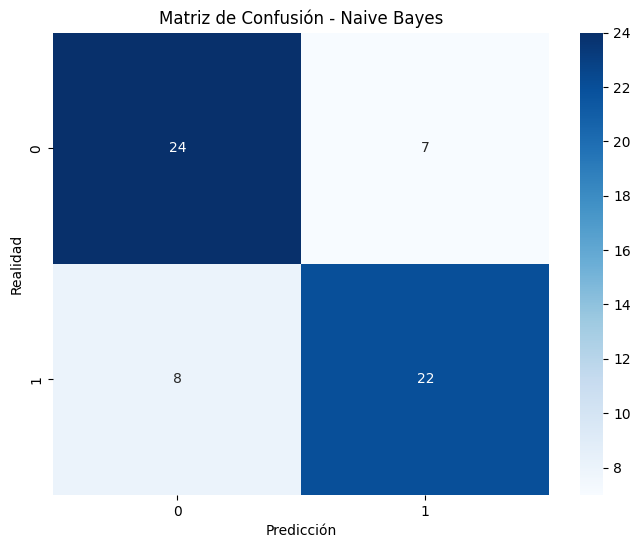

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred_nb)

# Crear el mapa de calor
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))

# Etiquetas y título
plt.title('Matriz de Confusión - Naive Bayes')
plt.xlabel('Predicción')
plt.ylabel('Realidad')

# Mostrar el gráfico
plt.show()


Exactitud KNN: 0.8360655737704918
Matriz de Confusión KNN:
 [[25  6]
 [ 4 26]]


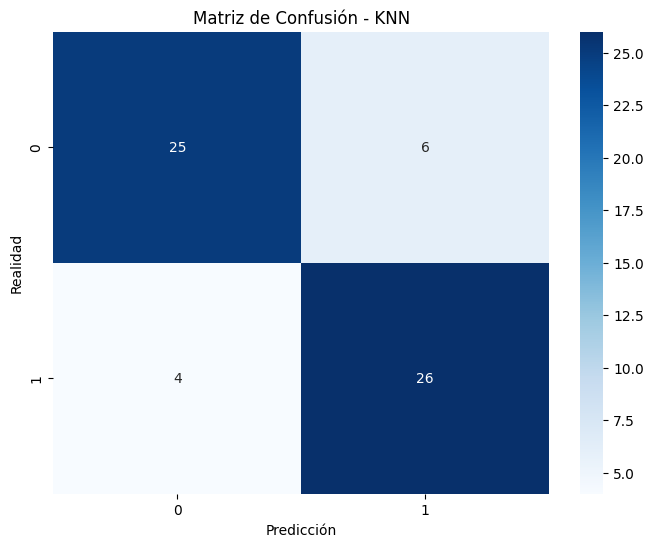

In [24]:
#Con los datos de entrenamiento cree un modelo de knn mediante el modelo de Naive Bayes -> importar, crear entrenar

from sklearn.neighbors import KNeighborsClassifier

# Crear el modelo KNN
knn_model = KNeighborsClassifier(n_neighbors=5)  # Puedes ajustar el número de vecinos

# Entrenar el modelo
knn_model.fit(X_train, y_train)

# Realizar predicciones
y_pred_knn = knn_model.predict(X_test)

# Evaluar el modelo
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("Exactitud KNN:", accuracy_knn)

# Calcular la matriz de confusión
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
print("Matriz de Confusión KNN:\n", conf_matrix_knn)

# Crear el mapa de calor para la matriz de confusión de KNN
cm_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Matriz de Confusión - KNN')
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.show()


Exactitud SVC: 0.7540983606557377
El modelo SVC obtuvo la misma exactitud que Naive Bayes.
Matriz de Confusión SVC:
 [[24  7]
 [ 8 22]]


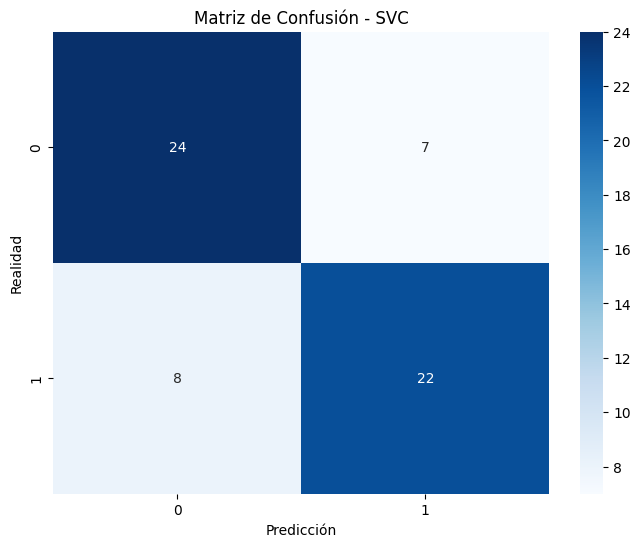

In [25]:
# Creeme el modelo de svc y por favor calculas el acuracy y me dices si mejoro o empeoro

from sklearn.svm import SVC

# Crear el modelo SVC
svc_model = SVC(kernel='linear', random_state=42)  # Puedes ajustar el kernel

# Entrenar el modelo
svc_model.fit(X_train, y_train)

# Realizar predicciones
y_pred_svc = svc_model.predict(X_test)

# Evaluar el modelo
accuracy_svc = accuracy_score(y_test, y_pred_svc)
print("Exactitud SVC:", accuracy_svc)

# Comparar con la exactitud de Naive Bayes
if accuracy_svc > accuracy_nb:
  print("El modelo SVC mejoró la exactitud en comparación con Naive Bayes.")
elif accuracy_svc < accuracy_nb:
  print("El modelo SVC empeoró la exactitud en comparación con Naive Bayes.")
else:
  print("El modelo SVC obtuvo la misma exactitud que Naive Bayes.")

# Calcular la matriz de confusión
conf_matrix_svc = confusion_matrix(y_test, y_pred_svc)
print("Matriz de Confusión SVC:\n", conf_matrix_svc)

# Crear el mapa de calor para la matriz de confusión de SVC
cm_svc = confusion_matrix(y_test, y_pred_svc)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svc, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Matriz de Confusión - SVC')
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.show()


Exactitud Árbol de Decisión: 0.7049180327868853
El modelo de Árbol de Decisión empeoró la exactitud en comparación con Naive Bayes.
Matriz de Confusión Árbol de Decisión:
 [[23  8]
 [10 20]]


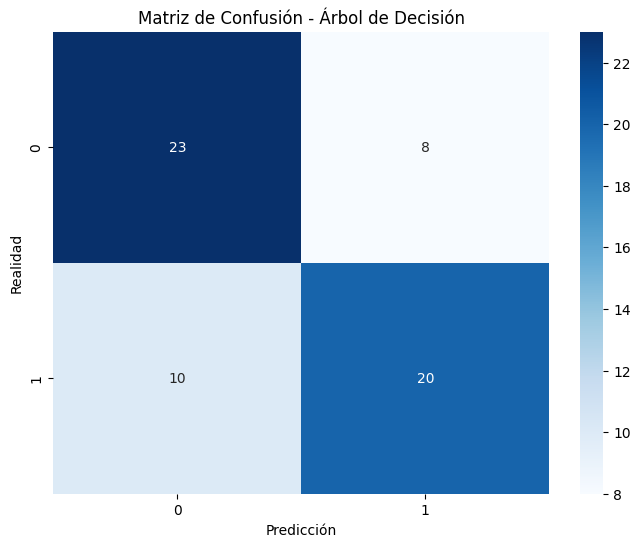

In [26]:
# prompt: cree el modelo de arbol de decision con los datos de entrenamiento y por favor me calcula el accuracy para ver cual modelo es el mejor

from sklearn.tree import DecisionTreeClassifier

# Crear el modelo de árbol de decisión
tree_model = DecisionTreeClassifier(random_state=42)

# Entrenar el modelo
tree_model.fit(X_train, y_train)

# Realizar predicciones
y_pred_tree = tree_model.predict(X_test)

# Evaluar el modelo
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print("Exactitud Árbol de Decisión:", accuracy_tree)

# Comparar con la exactitud de Naive Bayes
if accuracy_tree > accuracy_nb:
  print("El modelo de Árbol de Decisión mejoró la exactitud en comparación con Naive Bayes.")
elif accuracy_tree < accuracy_nb:
  print("El modelo de Árbol de Decisión empeoró la exactitud en comparación con Naive Bayes.")
else:
  print("El modelo de Árbol de Decisión obtuvo la misma exactitud que Naive Bayes.")

# Calcular la matriz de confusión
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)
print("Matriz de Confusión Árbol de Decisión:\n", conf_matrix_tree)

# Crear el mapa de calor para la matriz de confusión de Árbol de Decisión
cm_tree = confusion_matrix(y_test, y_pred_tree)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_tree, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Matriz de Confusión - Árbol de Decisión')
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.show()


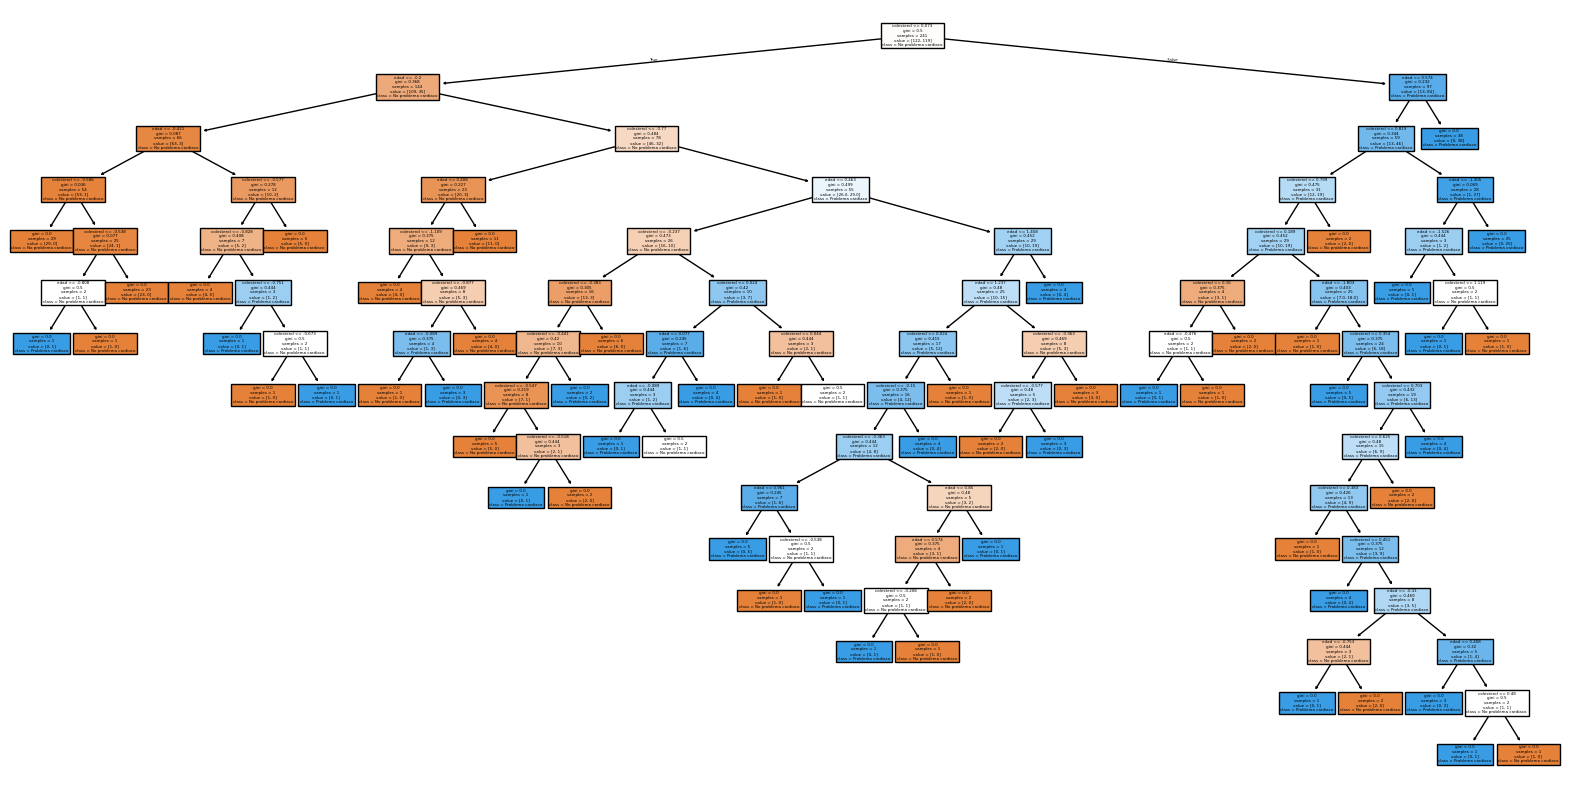

In [27]:
# prompt: muestreme el arbol en pantalla de el modelo entrenado

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Suponiendo que 'tree_model' es tu modelo de árbol de decisión entrenado
plt.figure(figsize=(20, 10))  # Ajusta el tamaño de la figura según sea necesario
plot_tree(tree_model, feature_names=['edad', 'colesterol'], class_names=['No problema cardiaco', 'Problema cardiaco'], filled=True)
plt.show()


In [28]:
# prompt: guardar con joblib el modelo knn unicamente

# Guardar el modelo KNN utilizando joblib
joblib.dump(knn_model, 'knn_model.joblib')

print("Modelo KNN guardado exitosamente.")


Modelo KNN guardado exitosamente.


![imagen](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRRpxfeW-Gm0W37txPc4BNoaB4Aj4h2nz-9BA&s)


In [ ]:
# Calcular el AUC
roc_auc_nb = roc_auc_score(y_test, nb_model.predict_proba(X_test)[:, 1])
print("AUC Naive Bayes:", roc_auc_nb)


AUC Naive Bayes: 0.8887096774193549


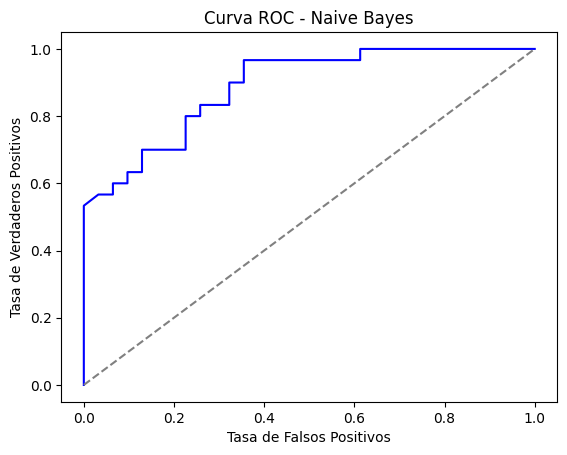

In [ ]:
# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, nb_model.predict_proba(X_test)[:, 1])
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='blue')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('Curva ROC - Naive Bayes')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.show()


In [ ]:
import joblib as jb

jb.dump(nb_model, 'nb_model.bin')

['nb_model.bin']

In [ ]:
df.columns

Index(['edad', 'colesterol', 'problema_cardiaco'], dtype='object')

In [ ]:
df.describe()

,edad,colesterol,problema_cardiaco
count,3.020000e+02,3.020000e+02,302.000000
mean,1.646953e-16,-1.294035e-16,0.493377
std,1.001660e+00,1.001660e+00,0.500786
min,-2.797827e+00,-2.349823e+00,0.000000
25%,-7.802653e-01,-6.831216e-01,0.000000
50%,7.650737e-02,-9.202408e-02,0.000000
75%,7.398153e-01,5.378339e-01,1.000000
max,2.508636e+00,6.138725e+00,1.000000


In [ ]:
import streamlit as st
import joblib
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Cargar el modelo y el scaler previamente entrenados
model = joblib.load('nb_model.bin')
scaler = joblib.load('scaler.pkl')

# Título de la aplicación
st.title('Herramienta para predecir si sufre del corazón')
st.subheader('Predicción de riesgo cardiovascular')
st.markdown("**Autor:** Alfredo Diaz")

# Barra lateral con entradas para las variables
st.sidebar.header("Parámetros de entrada")
edad = st.sidebar.slider('Edad', min_value=20, max_value=80, value=50, step=1)
colesterol = st.sidebar.slider('Colesterol', min_value=100, max_value=600, value=200, step=10)

# Mostrar los valores que el usuario ingresa
st.sidebar.write(f"Edad: {edad}")
st.sidebar.write(f"Colesterol: {colesterol}")

# Hacer la predicción usando el modelo cargado
if st.sidebar.button("Predecir"):
    # Preparar los datos de entrada como un DataFrame
    input_data = pd.DataFrame([[edad, colesterol]], columns=['edad', 'colesterol'])

    # Escalar los datos de entrada utilizando el scaler cargado
    input_data_scaled = scaler.transform(input_data)

    # Realizar la predicción
    prediccion = model.predict(input_data_scaled)

    # Mostrar el resultado de la predicción
    if prediccion == 0:
        st.success("Resultado: **No sufrirá del corazón**")
    else:
        st.warning("Resultado: **Advertencia, sufrirá del corazón**")
